In [1]:
%matplotlib inline
import random
import operator
from deap import creator
from deap import base
from deap import tools
from deap import gp
from app.ourMods import genGrow, cxPTreeGraft, draw

# Create a primitive set of float and integer types...

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

# a primitve set with two types: int and float
pset = gp.PrimitiveSetTyped(
    "MAIN",
    [int],
    float
)
pset.addPrimitive(operator.add, [float, float], float, name="fplus")
pset.addPrimitive(operator.sub, [int, int], int, name="iminus")
pset.addPrimitive(float, [int], float, name="float")
pset.addPrimitive(int, [float], int, name="int")
pset.addEphemeralConstant("Rfloat", lambda: random.uniform(0, 10), float)
pset = pset

# the toolbox
toolbox = base.Toolbox()
toolbox.register("expr", genGrow, pset, max_=4, prob=0.2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Creates a couple of Individuals to work with...

* And creates a list of types which they have in common.
* then tries to pick one (a type to graft upon)
 * if this raises an error then there are no common types to work with

In [4]:
# create two individuals
receiver = toolbox.individual()
contributor = toolbox.individual()

# find and choose a common return type
types1 = set([node.ret for node in receiver[1:]])
types2 = set([node.ret for node in contributor[1:]])
common_types = types1.intersection(types2)
graft_type = random.choice(list(common_types))

print("Receiver Types: ", types1)
print("Contributor Types: ", types2)
print("Types they have in common: ", list(common_types))

Receiver Types:  {<class 'float'>, <class 'int'>}
Contributor Types:  {<class 'float'>}
Types they have in common:  [<class 'float'>]


## Graft a branch from one to the other:

* pick a node on the receiver at random from all its nodes of the chosen type
* pick a node on the contributer at random from all its nodes of the chosen type
* copy the receiver then splice the contributed branch onto it
* draw everything

Receiver:


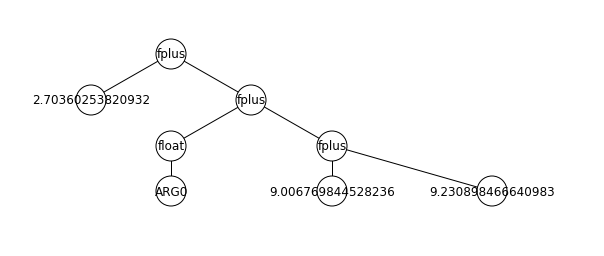

Contributor:


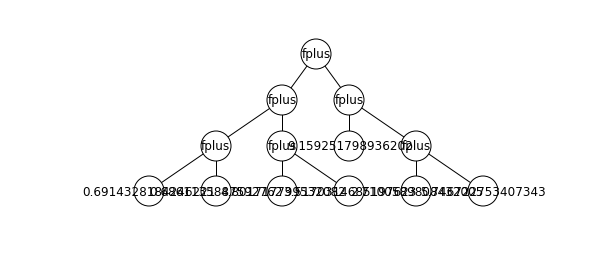

Type:  <class 'float'>
receiving node: (3, <deap.gp.Primitive object at 0x10d6c47c8>)
contribed node: (8, <deap.gp.Primitive object at 0x10d6c4728>)
Pruned Branch:


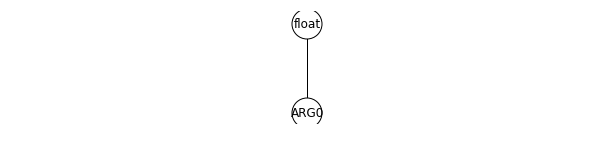

Contributed Branch:


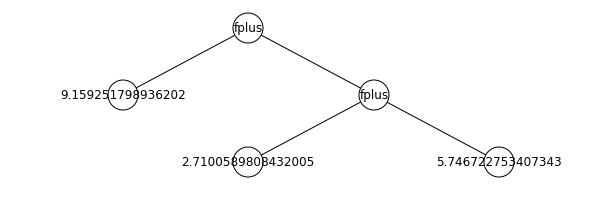

Child:


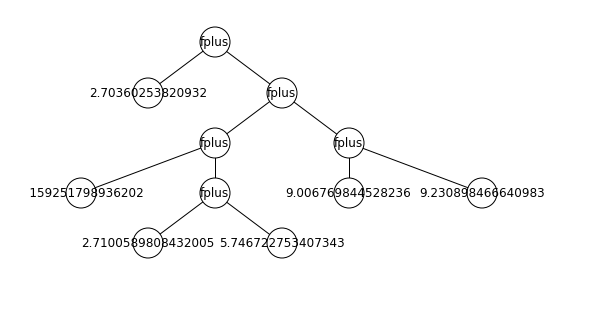

fplus(2.70360253820932, fplus(fplus(9.159251798936202, fplus(2.7100589808432005, 5.746722753407343)), fplus(9.006769844528236, 9.230898466640983)))


In [5]:
print("Receiver:")
draw(receiver)
print("Contributor:")
draw(contributor)

# pick the nodes
receiving_node = random.choice([(i, node) for i, node in enumerate(receiver) if node.ret is graft_type])
contributed_node = random.choice([(i, node) for i, node in enumerate(contributor) if node.ret is graft_type ])

print("Type: ", graft_type)
print("receiving node:", receiving_node)
print("contribed node:", contributed_node)

child = receiver.copy()
pruned_slice = receiver.searchSubtree(receiving_node[0])
contributed_slice = contributor.searchSubtree(contributed_node[0])
child[pruned_slice] = contributor[contributed_slice]
child = gp.PrimitiveTree(child)

print("Pruned Branch:")
draw(gp.PrimitiveTree(receiver[pruned_slice]))
print("Contributed Branch:")
draw(gp.PrimitiveTree(contributor[contributed_slice]))

print("Child:")
draw(child)
print(child)

## That shows how it's done, now do it with the library routine

* with the same individuals, but the graft will probably be different, or error.

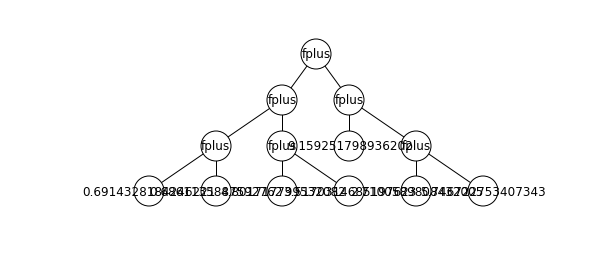

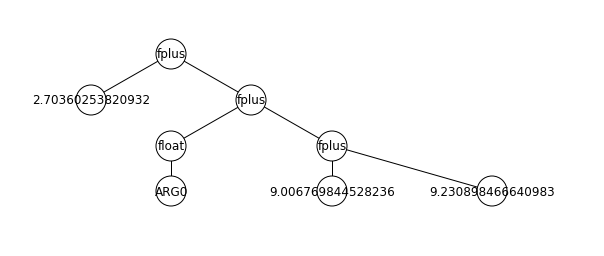

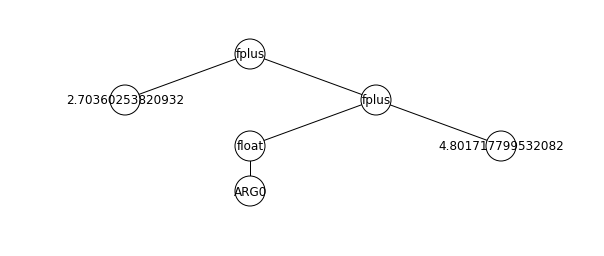

In [7]:
from app.ourMods import cxPTreeGraft

child = creator.Individual(cxPTreeGraft(receiver, contributor))
draw(contributor)
draw(receiver)
draw(child)